# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [2]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd

city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [3]:
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


## Deliverable 1: Get a Summary DataFrame 

In [4]:
#  1. Get the total rides for each city type
# 2. Get the total drivers for each city type
#  3. Get the total amount of fares for each city type
#  4. Get the average fare per ride for each city type. 
# 5. Get the average fare per driver for each city type. 
#  6. Create a PyBer summary DataFrame. 

total_rides_by_city = pyber_data_df.groupby("type").count()["ride_id"]
# In Step 2, use the groupby() function to create a Series of data that has the type of city as the index,
#then apply the sum() method to the "driver_count" column.
total_drivers_by_city = city_data_df.groupby(["type"]).sum()["driver_count"] # << ????
total_fares_by_city = pyber_data_df.groupby("type").sum()["fare"]

average_fare_per_ride = total_fares_by_city / total_rides_by_city
average_fare_per_driver = total_fares_by_city / total_drivers_by_city

pyber_summary_df = pd.DataFrame({
        "Total Rides": total_rides_by_city,
        "Total Drivers": total_drivers_by_city,
        "Total Fares": total_fares_by_city,
        "Average Fare per Ride": average_fare_per_ride,
        "Average Fare per Driver": average_fare_per_driver
        })
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
type,,,,,
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [6]:
#  7. Cleaning up the DataFrame. Delete the index name
#  8. Format the columns.
pyber_summary_df.index.name = None
pyber_summary_df['Total Rides'] = pyber_summary_df.apply(lambda x: "{:,.0f}".format(x['Total Rides']), axis=1)
pyber_summary_df['Total Drivers'] = pyber_summary_df.apply(lambda x: "{:,.0f}".format(x['Total Drivers']), axis=1)
pd.options.display.float_format = '${:,.2f}'.format
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,"1,625","2,405","$39,854.38",$24.53,$16.57


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [7]:
# 1. Read the merged DataFrame
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,$13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,$30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,$33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,$23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,$34.58,3908451377344,46,Urban


In [8]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
# 
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 

pyber_data_df_new = pd.DataFrame(pyber_data_df.groupby(["type", "date"]).sum()["fare"])
pyber_data_df_new = pyber_data_df_new.reset_index()
pyber_data_df_new = pyber_data_df_new.pivot(index="date", columns="type", values="fare")
pyber_data_df_new

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,$nan,$nan,$37.91
2019-01-01 00:46:46,$nan,$47.74,$nan
2019-01-01 02:07:24,$nan,$24.07,$nan
2019-01-01 03:46:50,$nan,$nan,$7.57
2019-01-01 05:23:21,$nan,$nan,$10.75
...,...,...,...
2019-05-08 04:20:00,$nan,$nan,$21.99
2019-05-08 04:39:49,$nan,$nan,$18.45
2019-05-08 07:29:01,$nan,$nan,$18.55


In [9]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
# 7. Check that the datatype for the index is datetime using df.info()

pyber_data_df_dates = pyber_data_df_new.loc['2019-01-01':'2019-04-29']
pyber_data_df_dates.index = pd.to_datetime(pyber_data_df_dates.index)
pyber_data_df_dates.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2196 entries, 2019-01-01 00:08:16 to 2019-04-28 19:35:03
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     114 non-null    float64
 1   Suburban  573 non-null    float64
 2   Urban     1509 non-null   float64
dtypes: float64(3)
memory usage: 68.6 KB


In [10]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
pyber_data_df_dates = pyber_data_df_dates.resample('1W').sum()
pyber_data_df_dates

type,Rural,Suburban,Urban
date,,,
2019-01-06,$187.92,$721.60,"$1,661.68"
2019-01-13,$67.65,"$1,105.13","$2,050.43"
2019-01-20,$306.00,"$1,218.20","$1,939.02"
2019-01-27,$179.69,"$1,203.28","$2,129.51"
2019-02-03,$333.08,"$1,042.79","$2,086.94"
2019-02-10,$115.80,$974.34,"$2,162.64"
2019-02-17,$95.82,"$1,045.50","$2,235.07"
2019-02-24,$419.06,"$1,412.74","$2,466.29"
2019-03-03,$175.14,$858.46,"$2,218.20"


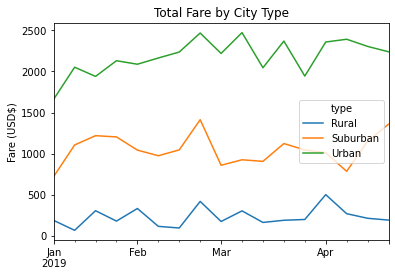

In [11]:
# 8. Using the object-oriented interface method, plot the resampled DataFrame using the df.plot() function. 

pyber_data_df_dates.plot()
plt.title("Total Fare by City Type")
plt.xlabel("")
plt.ylabel("Fare (USD$)")
plt.savefig("analysis/Fig8.png")
# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')
